## Diamond Analysis Pt5 (actually 4)
### Analyze and Retrain w/ BlueNile Data Only

A few things happened
1.  I found out that all these diamond datasets are either dated or fictious on the web
2.  Cross testing across datasets yielded poor predictions mainly because the data was quite different in pricing
3.  I was able to hack thru the problems downloading bluenile data by running in a time-delayed fetch so now I have 50k of market priced diamonds w/ good attribution (great quantity 140k rows of round cut)

So now the approach is stick w/ bluenile data.  I pulled the entire lot of Round cut diamonds which is 50k+ rows.   We can start w/ that as the baseline dataset.  I do want to combine w/ Tiffany's and other luxury diamond dealers to understand how premium name brands affect pricing.

 
### Step 1 Load and Clean up

In [1]:
# loading important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import myutils 
 
# Loading the data
diamonds5 = pd.read_csv('./blue-nile-download-round-full.csv')
print(diamonds5.shape)
print(diamonds5.describe())
print(diamonds5.columns)

diamonds5.head()

(141458, 27)
       imageUrl         price   sellingIndex
count       0.0  1.414580e+05  141458.000000
mean        NaN  4.599543e+03       0.375252
std         NaN  1.933595e+04       0.150851
min         NaN  2.810000e+02       0.000029
25%         NaN  5.870000e+02       0.288981
50%         NaN  1.248000e+03       0.376647
75%         NaN  3.271000e+03       0.463128
max         NaN  2.055533e+06       0.962772
Index(['carat', 'clarity', 'color', 'culet', 'cut', 'date', 'dateSet', 'depth',
       'detailsPageUrl', 'fluorescence', 'hasVisualization', 'id', 'imageUrl',
       'lxwRatio', 'measurements', 'polish', 'price', 'pricePerCarat',
       'sellingIndex', 'shapeCode', 'shapeName', 'skus', 'symmetry', 'table',
       'v360BaseUrl', 'visualizationImageUrl', 'willArriveForHoliday'],
      dtype='object')


carat clarity  color     culet  \
0  ['0.23']  ['FL']  ['D']  ['None']   
1  ['0.23']  ['FL']  ['D']  ['None']   
2  ['0.23']  ['FL']  ['D']  ['None']   
3  ['0.23']  ['FL']  ['D']  ['None']   
4  ['0.23']  ['FL']  ['D']  ['None']   

                                           cut        date    dateSet  \
0  [{'label': 'Ideal', 'labelSmall': 'Ideal'}]  ['Sep 30']  ['Oct 1']   
1  [{'label': 'Ideal', 'labelSmall': 'Ideal'}]  ['Sep 30']  ['Oct 1']   
2  [{'label': 'Ideal', 'labelSmall': 'Ideal'}]  ['Sep 30']  ['Oct 1']   
3  [{'label': 'Ideal', 'labelSmall': 'Ideal'}]  ['Sep 30']  ['Oct 1']   
4  [{'label': 'Ideal', 'labelSmall': 'Ideal'}]  ['Sep 30']  ['Oct 1']   

      depth                detailsPageUrl fluorescence  ... pricePerCarat  \
0  ['58.8']  ./diamond-details/LD12750672     ['None']  ...    ['$3,787']   
1  ['59.6']  ./diamond-details/LD12389454     ['None']  ...    ['$3,743']   
2  ['59.7']  ./diamond-details/LD12750664     ['None']  ...    ['$3,765']   
3  ['59.8']  ./diamond-details/LD12505728     ['None']  ...    ['$3,630']   
4  ['60.1']  ./diamond-details/LD12505726     ['None']  ...    ['$3,630']   

  sellingIndex  shapeCode  shapeName            skus       symmetry     table  \
0     0.734835     ['RD']  ['Round']  ['LD12750672']  ['Excellent']  ['60.0']   
1     0.521523     ['RD']  ['Round']  ['LD12389454']  ['Excellent']  ['59.0']   
2     0.518767     ['RD']  ['Round']  ['LD12750664']  ['Excellent']  ['60.0']   
3     0.649935     ['RD']  ['Round']  ['LD12505728']  ['Excellent']  ['59.0']   
4     0.411232     ['RD']  ['Round']  ['LD12505726']  ['Excellent']  ['59.0']   

                                         v360BaseUrl  \
0  https://bluenile.v360.in/50/imaged/gia-7313767...   
1  https://bluenile.v360.in/50/imaged/gia-7316836...   
2  https://bluenile.v360.in/50/imaged/gia-2316863...   
3  https://bluenile.v360.in/19/imaged/gia-6322878...   
4  https://bluenile.v360.in/19/imaged/gia-6321890...   

                               visualizationImageUrl willArriveForHoliday  
0  https://bnsec.bluenile.com/bnsecure/diamondvis...                False  
1  https://bnsec.bluenile.com/bnsecure/diamondvis...                False  
2  https://bnsec.bluenile.com/bnsecure/diamondvis...                False  
3  https://bnsec.bluenile.com/bnsecure/diamondvis...                False  
4  https://bnsec.bluenile.com/bnsecure/diamondvis...                False  

[5 rows x 27 columns]

In [7]:
# clean up fields
diamonds5a = diamonds5.copy()
diamonds5a.loc[:,'carat'] = diamonds5a.loc[:,'carat'].to_frame().applymap(myutils.cleanBracketsToF)
diamonds5a.loc[:,'clarity'] = diamonds5a.loc[:,'clarity'].to_frame().applymap(myutils.cleanBracketsToS)
diamonds5a.loc[:,'color'] = diamonds5a.loc[:,'color'].to_frame().applymap(myutils.cleanBracketsToS)
diamonds5a.loc[:,'cut'] = diamonds5a.loc[:,'cut'].to_frame().applymap(myutils.cleanCut)
diamonds5a.loc[:,'skus'] = diamonds5a.loc[:,'skus'].to_frame().applymap(myutils.cleanBracketsToS)

# clear nulls
pd.set_option('use_inf_as_na', True)

diamonds5a = diamonds5a.loc[~diamonds5a['carat'].isnull()]  
diamonds5a = diamonds5a.loc[~diamonds5a['price'].isnull()]  
diamonds5a = diamonds5a[['carat','color','cut','clarity','price','skus']]
diamonds5a.sample(n=5,random_state=11 )

# print(diamonds5.iloc[32320:32321]['price'])   # price 713 
# print(diamonds5a.iloc[32320:32321])  # price 713

carat color    cut clarity  price        skus
14465    0.30     I  Ideal     SI2    362  LD11384817
21579    0.30     J  Ideal    VVS1    462  LD12502136
57231    0.41     D  Ideal     SI1    867  LD12530429
119118   1.01     G  Ideal     VS2   6800  LD12877187
11613    0.30     D  Ideal     SI2    491  LD11285594

In [8]:
# drop any nulls
print(diamonds5a.shape)
diamonds5a = diamonds5a.dropna()
print(diamonds5a.shape)


(141458, 6)
(141458, 6)


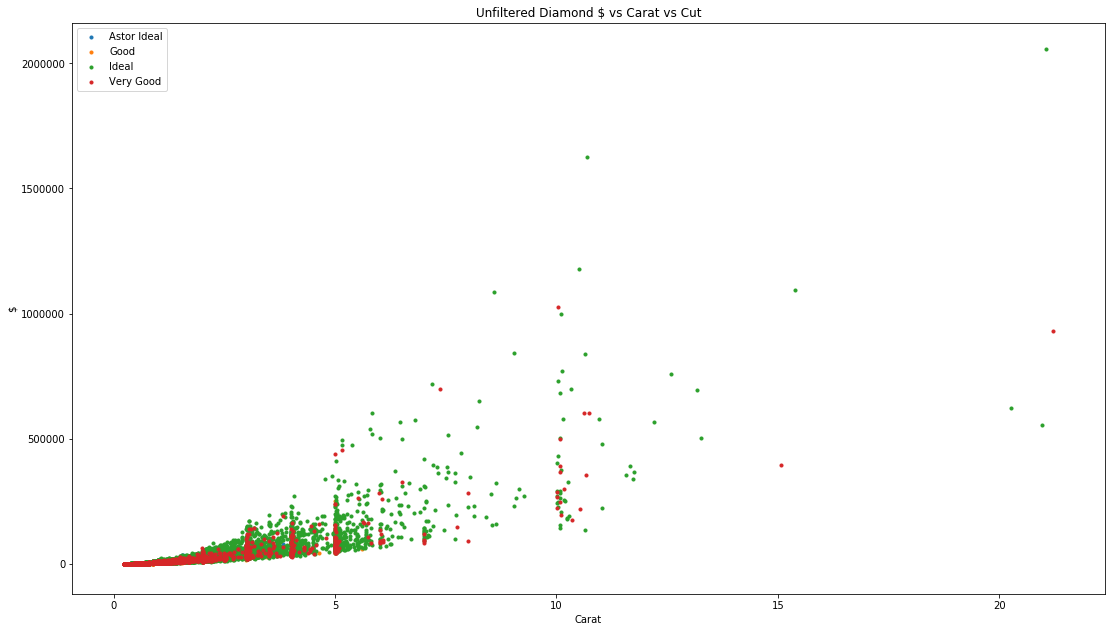

In [9]:
# full dataset
fig, ax = plt.subplots()
for c, df in diamonds5a.groupby('cut'):
    ax.scatter(df['carat'], df['price'], label=c, s=np.pi*3)
ax.legend()
ax.set_title('Unfiltered Diamond $ vs Carat vs Cut')
ax.set_xlabel('Carat')
ax.set_ylabel('$')
fig.set_size_inches(18.5, 10.5)
plt.show()


In [30]:
# narrow down to <= 5 carats since beyond this has alot less data

diamonds5b = diamonds5a.loc[(diamonds5a['carat'] <= 4.5)]
print(diamonds5b.head())

# save this file
diamonds5b.to_csv('diamonds5b-4c+price-sku.csv')   # save once at least
diamonds5b.describe()


   carat color    cut clarity  price        skus
0   0.23     D  Ideal      FL    871  LD12750672
1   0.23     D  Ideal      FL    861  LD12389454
2   0.23     D  Ideal      FL    866  LD12750664
3   0.23     D  Ideal      FL    835  LD12505728
4   0.23     D  Ideal      FL    835  LD12505726


carat          price
count  140838.000000  140838.000000
mean        0.658144    3823.331927
std         0.517062    9050.689493
min         0.230000     281.000000
25%         0.330000     586.000000
50%         0.500000    1240.000000
75%         0.780000    3181.000000
max         4.500000  272018.000000

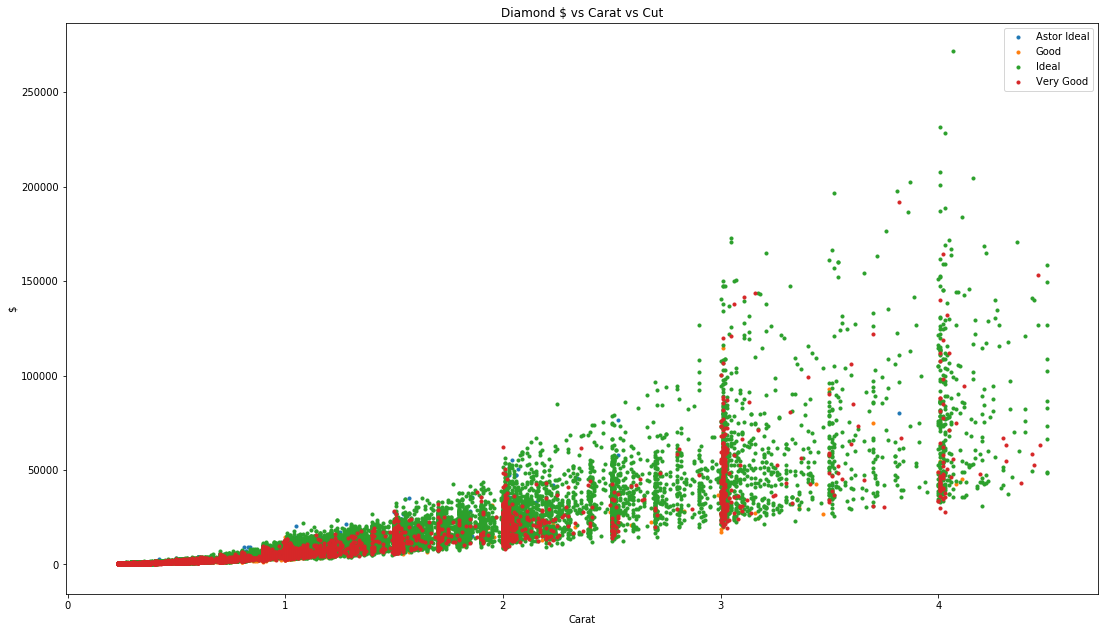

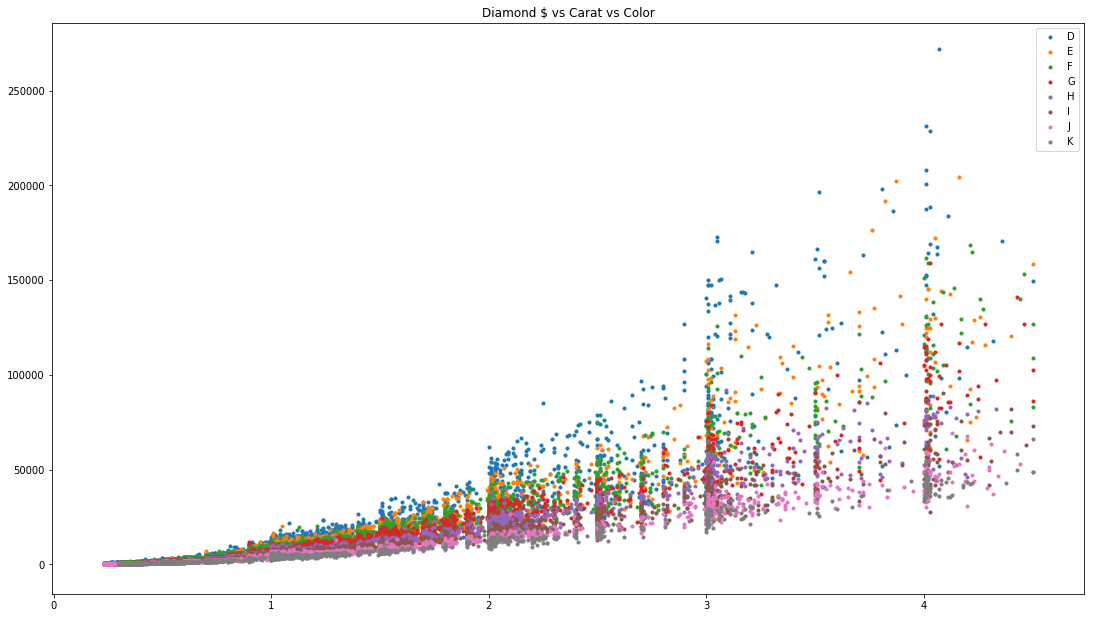

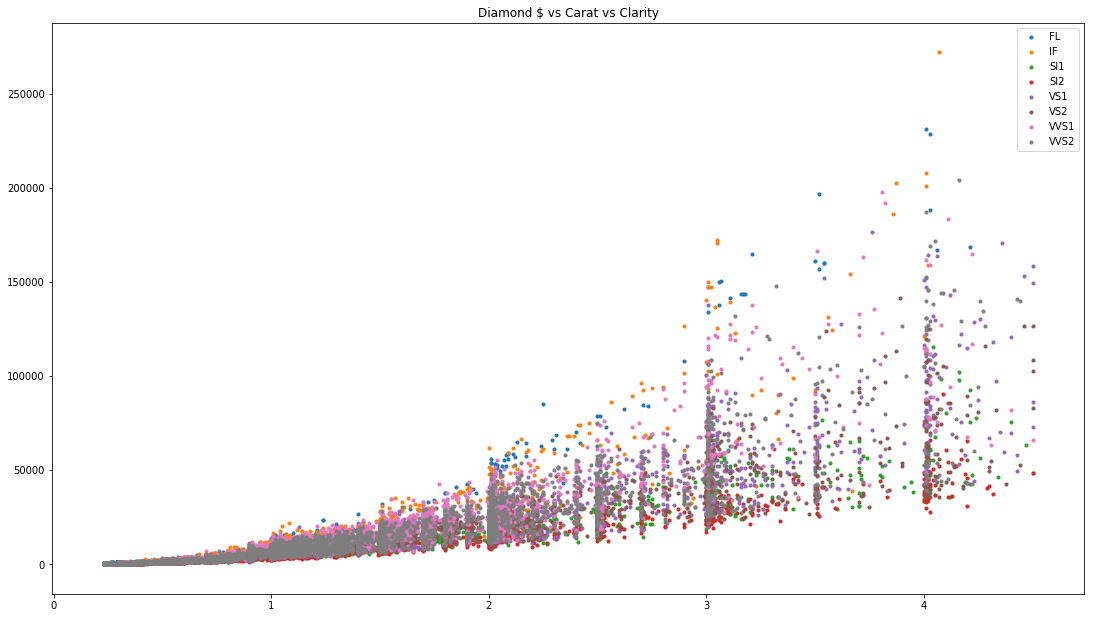

In [11]:
# scatter carat to price
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for c, df in diamonds5b.groupby('cut'):
    ax.scatter(df['carat'], df['price'], label=c, s=np.pi*3)
ax.legend()
ax.set_title('Diamond $ vs Carat vs Cut')
ax.set_xlabel('Carat')
ax.set_ylabel('$')
fig.set_size_inches(18.5, 10.5)
plt.show()

fig, ax = plt.subplots()
for c, df in diamonds5b.groupby('color'):
    ax.scatter(df['carat'], df['price'], label=c, s=np.pi*3)
ax.legend()
ax.set_title('Diamond $ vs Carat vs Color')
fig.set_size_inches(18.5, 10.5)
plt.show()

fig, ax = plt.subplots()
for c, df in diamonds5b.groupby('clarity'):
    ax.scatter(df['carat'], df['price'], label=c, s=np.pi*3)
ax.legend()
ax.set_title('Diamond $ vs Carat vs Clarity')
fig.set_size_inches(18.5, 10.5)
plt.show()



### OneHot the categoricals and build final diamonds5c set

In [13]:
cut = pd.get_dummies( diamonds5b['cut'], prefix='cut_')
color = pd.get_dummies( diamonds5b['color'], prefix='color_')
clarity = pd.get_dummies( diamonds5b['clarity'], prefix='clarity_')
diamonds5c = diamonds5b[['carat','price','skus']]
diamonds5c = diamonds5c.join(cut).join(color).join(clarity)

assert(len(diamonds5c.loc[diamonds5c['price'].isnull()]) == 0)
diamonds5c.head()


carat  price        skus  cut__Astor Ideal  cut__Good  cut__Ideal  \
0   0.23    871  LD12750672                 0          0           1   
1   0.23    861  LD12389454                 0          0           1   
2   0.23    866  LD12750664                 0          0           1   
3   0.23    835  LD12505728                 0          0           1   
4   0.23    835  LD12505726                 0          0           1   

   cut__Very Good  color__D  color__E  color__F  ...  color__J  color__K  \
0               0         1         0         0  ...         0         0   
1               0         1         0         0  ...         0         0   
2               0         1         0         0  ...         0         0   
3               0         1         0         0  ...         0         0   
4               0         1         0         0  ...         0         0   

   clarity__FL  clarity__IF  clarity__SI1  clarity__SI2  clarity__VS1  \
0            1            0             0             0             0   
1            1            0             0             0             0   
2            1            0             0             0             0   
3            1            0             0             0             0   
4            1            0             0             0             0   

   clarity__VS2  clarity__VVS1  clarity__VVS2  
0             0              0              0  
1             0              0              0  
2             0              0              0  
3             0              0              0  
4             0              0              0  

[5 rows x 23 columns]

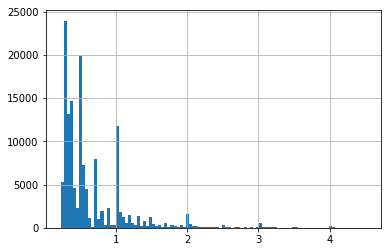

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

diamonds5c['carat'].hist(bins=100)

Text(0, 0.5, 'Number')

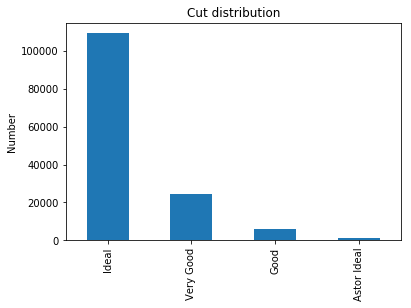

In [15]:
cuts = diamonds5b['cut'].value_counts()
cuts.plot(kind='bar')
plt.title('Cut distribution')
plt.ylabel('Number')

Text(0, 0.5, 'Number')

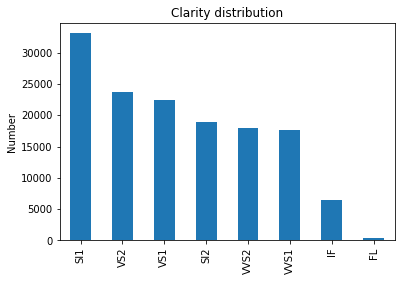

In [16]:
c = diamonds5b['clarity'].value_counts()
c.plot(kind='bar')
plt.title('Clarity distribution')
plt.ylabel('Number')

Text(0, 0.5, 'Number')

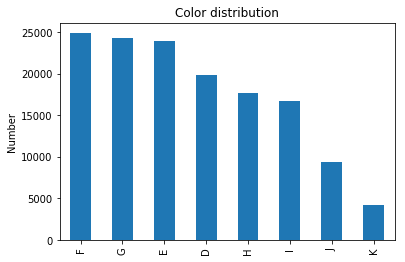

In [17]:
c = diamonds5b['color'].value_counts()
c.plot(kind='bar')
plt.title('Color distribution')
plt.ylabel('Number')

## Normalize/Scale the other input columns (diamonds5d)

In [18]:
from sklearn import preprocessing

assert(len(diamonds5c.loc[diamonds5c['carat'].isnull()]) == 0)

### scale carat->caratScaled
# caratDF = diamonds5c['carat'].to_frame()
# scaler = preprocessing.StandardScaler().fit(caratDF)
# caratDF = pd.DataFrame(scaler.transform(caratDF),columns=['caratScaled'], index=diamonds5c.index)
# diamonds5d = diamonds5c
diamonds5d = diamonds5c
diamonds5d['caratScaled'] = diamonds5d['carat']

# ### normalizing one-hots probably not necessary
# scaler = preprocessing.StandardScaler().fit(diamonds5c.drop(columns=['price']))
# # caratDF = pd.DataFrame(scaler.transform(caratDF),columns=['caratScaled'], index=diamonds5c.index)
# diamonds5d = pd.DataFrame(scaler.transform(diamonds5c.drop(columns=['price'])), 
#                           columns=diamonds5c.drop(columns=['price']).columns, index=diamonds5c.index)
# diamonds5d['price'] = diamonds5c['price']

# print(caratDF.shape)
# print(diamonds5c.shape)
print(diamonds5d.shape)

#diamonds5d = pd.concat([ diamonds5d, caratDF], axis=1)
diamonds5d.to_csv('diamonds5d-4c+price-onehotscaled.csv')
diamonds5d.tail()

(140838, 24)


carat   price        skus  cut__Astor Ideal  cut__Good  cut__Ideal  \
140896    4.5   82962  LD12644055                 0          0           1   
140897    4.5  126878  LD07328378                 0          0           1   
140898    4.5  108662  LD12825599                 0          0           1   
140899    4.5  102501  LD12746565                 0          0           1   
140900    4.5   66129  LD09175452                 0          0           1   

        cut__Very Good  color__D  color__E  color__F  ...  color__K  \
140896               0         0         0         1  ...         0   
140897               0         0         0         1  ...         0   
140898               0         0         0         1  ...         0   
140899               0         0         0         0  ...         0   
140900               0         0         0         0  ...         1   

        clarity__FL  clarity__IF  clarity__SI1  clarity__SI2  clarity__VS1  \
140896            0            0             0             0             0   
140897            0            0             0             0             0   
140898            0            0             0             0             0   
140899            0            0             0             0             0   
140900            0            0             0             0             0   

        clarity__VS2  clarity__VVS1  clarity__VVS2  caratScaled  
140896             1              0              0          4.5  
140897             1              0              0          4.5  
140898             1              0              0          4.5  
140899             1              0              0          4.5  
140900             0              1              0          4.5  

[5 rows x 24 columns]

## Now ready to train a models

We will step thru a few cases
1. Linear using carat only, then color, clarity, cut only
2. Linear using carat + one of the others
3. Linear using carat + two of the others
4. Linear using all 4c's
5. RandomForest using all 4c's
6. XGBoost using all 4c's

In [19]:
from sklearn.model_selection import train_test_split
from myutils import *

train, test = train_test_split(diamonds5d, random_state=12)
train_Y, test_Y = train['price'], test['price']


## Experiments 1a-1d -- single sets of features

Score:  0.7429062134434539


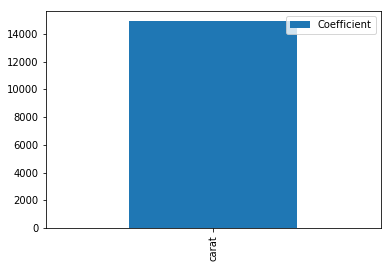

coefficients: [14926.80316553]
intercept: -5993.532236063467
Mean squared error: 19194594.96
R2 Variance score: 0.74
       carat
95968   0.62
18173   0.30
        actual      predict         diff       diff%
95968     2703  3261.085727  -558.085727   20.646901
18173      712 -1515.491286  2227.491286  312.849900
43632      861  -619.883096  1480.883096  171.995714
8241       456 -1515.491286  1971.491286  432.344580
109702    3825  7440.590613 -3615.590613   94.525245
17779      535 -1515.491286  2050.491286  383.269399
39020      691  -918.419160  1609.419160  232.911601
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  0.00036189539872211185


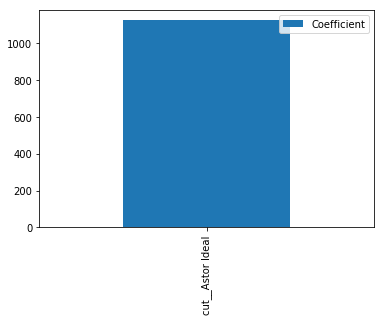

coefficients: [1123.69311131]
intercept: 3831.400099275479
Mean squared error: 74632875.37
R2 Variance score: 0.00
       cut__Astor Ideal
95968                 0
18173                 0
        actual      predict         diff       diff%
95968     2703  3831.400099 -1128.400099   41.746212
18173      712  3831.400099 -3119.400099  438.117991
43632      861  3831.400099 -2970.400099  344.994204
8241       456  3831.400099 -3375.400099  740.219320
109702    3825  3831.400099    -6.400099    0.167323
17779      535  3831.400099 -3296.400099  616.149551
39020      691  3831.400099 -3140.400099  454.471794
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  0.0005981868746838259


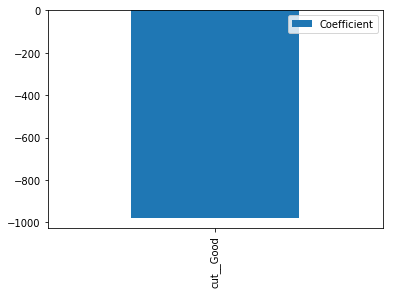

coefficients: [-977.23279555]
intercept: 3881.6850047434627
Mean squared error: 74615233.87
R2 Variance score: 0.00
       cut__Good
95968          0
18173          0
        actual      predict         diff       diff%
95968     2703  3881.685005 -1178.685005   43.606548
18173      712  3881.685005 -3169.685005  445.180478
43632      861  3881.685005 -3020.685005  350.834495
8241       456  3881.685005 -3425.685005  751.246712
109702    3825  3881.685005   -56.685005    1.481961
17779      535  3881.685005 -3346.685005  625.548599
39020      691  3881.685005 -3190.685005  461.748915
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  0.0011341056509739378


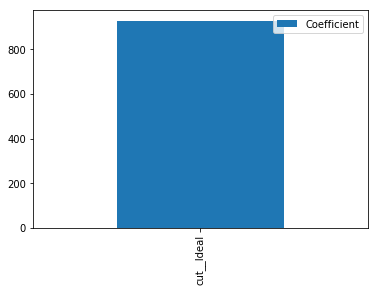

coefficients: [929.57254868]
intercept: 3117.7592182577246
Mean squared error: 74575222.23
R2 Variance score: 0.00
       cut__Ideal
95968           0
18173           0
        actual      predict         diff       diff%
95968     2703  3117.759218  -414.759218   15.344403
18173      712  3117.759218 -2405.759218  337.887531
43632      861  4047.331767 -3186.331767  370.073376
8241       456  4047.331767 -3591.331767  787.572756
109702    3825  3117.759218   707.240782   18.489955
17779      535  4047.331767 -3512.331767  656.510611
39020      691  4047.331767 -3356.331767  485.720950
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  0.0008231695165885621


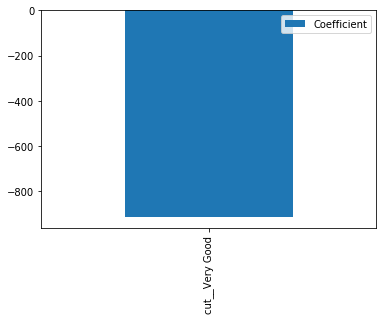

coefficients: [-916.3918796]
intercept: 3998.3767539195073
Mean squared error: 74598436.69
R2 Variance score: 0.00
       cut__Very Good
95968               1
18173               1
        actual      predict         diff       diff%
95968     2703  3081.984874  -378.984874   14.020898
18173      712  3081.984874 -2369.984874  332.863044
43632      861  3998.376754 -3137.376754  364.387544
8241       456  3998.376754 -3542.376754  776.837007
109702    3825  3081.984874   743.015126   19.425232
17779      535  3998.376754 -3463.376754  647.360141
39020      691  3998.376754 -3307.376754  478.636289
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  0.004363006915469869


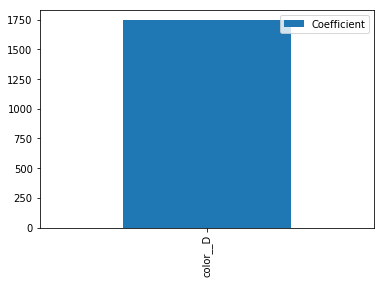

coefficients: [1742.4571395]
intercept: 3594.0270076534866
Mean squared error: 74334152.80
R2 Variance score: 0.00
       color__D
95968         0
18173         0
        actual      predict         diff       diff%
95968     2703  3594.027008  -891.027008   32.964373
18173      712  3594.027008 -2882.027008  404.779074
43632      861  3594.027008 -2733.027008  317.424740
8241       456  3594.027008 -3138.027008  688.163817
109702    3825  3594.027008   230.972992    6.038510
17779      535  3594.027008 -3059.027008  571.780749
39020      691  5336.484147 -4645.484147  672.284247
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  8.549480883968119e-05


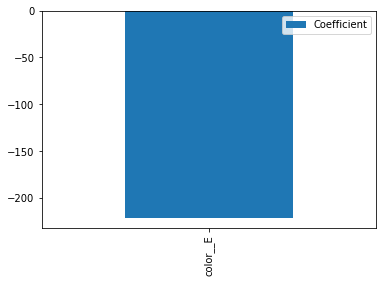

coefficients: [-221.39007504]
intercept: 3878.1348058490353
Mean squared error: 74653511.40
R2 Variance score: 0.00
       color__E
95968         1
18173         1
        actual      predict         diff       diff%
95968     2703  3656.744731  -953.744731   35.284674
18173      712  3656.744731 -2944.744731  413.587743
43632      861  3878.134806 -3017.134806  350.422161
8241       456  3656.744731 -3200.744731  701.917704
109702    3825  3878.134806   -53.134806    1.389145
17779      535  3656.744731 -3121.744731  583.503688
39020      691  3878.134806 -3187.134806  461.235138
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  -0.00019886752646014472


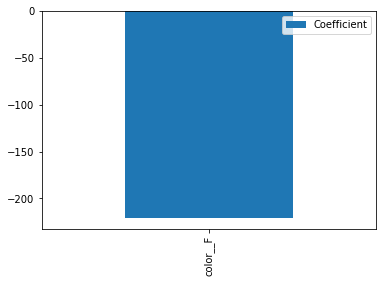

coefficients: [-221.08600654]
intercept: 3879.6489257756334
Mean squared error: 74674741.87
R2 Variance score: -0.00
       color__F
95968         0
18173         0
        actual      predict         diff       diff%
95968     2703  3879.648926 -1176.648926   43.531222
18173      712  3879.648926 -3167.648926  444.894512
43632      861  3879.648926 -3018.648926  350.598017
8241       456  3879.648926 -3423.648926  750.800203
109702    3825  3879.648926   -54.648926    1.428730
17779      535  3879.648926 -3344.648926  625.168024
39020      691  3879.648926 -3188.648926  461.454258
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  1.0033613445981082e-05


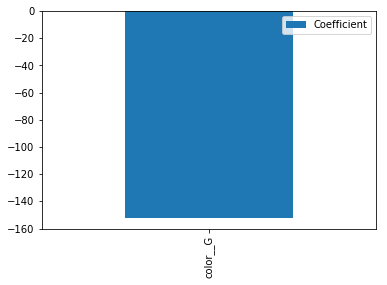

coefficients: [-152.40885665]
intercept: 3866.8287056617996
Mean squared error: 74659145.33
R2 Variance score: 0.00
       color__G
95968         0
18173         0
        actual      predict         diff       diff%
95968     2703  3866.828706 -1163.828706   43.056926
18173      712  3866.828706 -3154.828706  443.093919
43632      861  3866.828706 -3005.828706  349.109025
8241       456  3866.828706 -3410.828706  747.988751
109702    3825  3866.828706   -41.828706    1.093561
17779      535  3866.828706 -3331.828706  622.771721
39020      691  3866.828706 -3175.828706  459.598944
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  -0.00010447400370949822


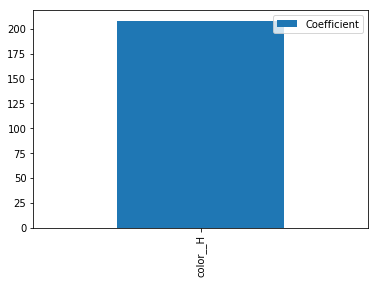

coefficients: [208.09710791]
intercept: 3814.6414328836217
Mean squared error: 74667694.46
R2 Variance score: -0.00
       color__H
95968         0
18173         0
        actual      predict         diff       diff%
95968     2703  3814.641433 -1111.641433   41.126209
18173      712  3814.641433 -3102.641433  435.764246
43632      861  4022.738541 -3161.738541  367.217020
8241       456  3814.641433 -3358.641433  736.544174
109702    3825  3814.641433    10.358567    0.270812
17779      535  3814.641433 -3279.641433  613.017090
39020      691  3814.641433 -3123.641433  452.046517
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  0.0006992632261206833


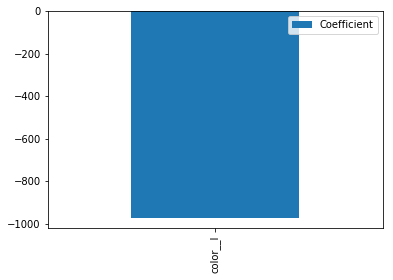

coefficients: [-974.15102912]
intercept: 3956.15613889994
Mean squared error: 74607687.52
R2 Variance score: 0.00
       color__I
95968         0
18173         0
        actual      predict         diff       diff%
95968     2703  3956.156139 -1253.156139   46.361677
18173      712  3956.156139 -3244.156139  455.639907
43632      861  3956.156139 -3095.156139  359.483872
8241       456  3956.156139 -3500.156139  767.578101
109702    3825  2982.005110   842.994890   22.039082
17779      535  3956.156139 -3421.156139  639.468437
39020      691  3956.156139 -3265.156139  472.526214
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  0.00025000132682473364


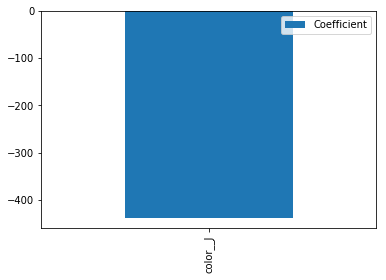

coefficients: [-438.32146787]
intercept: 3870.0409766195808
Mean squared error: 74641229.37
R2 Variance score: 0.00
       color__J
95968         0
18173         0
        actual      predict         diff       diff%
95968     2703  3870.040977 -1167.040977   43.175767
18173      712  3870.040977 -3158.040977  443.545081
43632      861  3870.040977 -3009.040977  349.482111
8241       456  3870.040977 -3414.040977  748.693197
109702    3825  3870.040977   -45.040977    1.177542
17779      535  3870.040977 -3335.040977  623.372145
39020      691  3870.040977 -3179.040977  460.063817
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  0.00013347221331738712


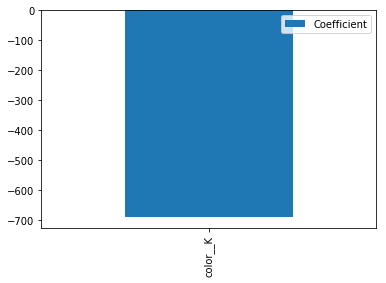

coefficients: [-690.03120879]
intercept: 3861.5557323752505
Mean squared error: 74649929.42
R2 Variance score: 0.00
       color__K
95968         0
18173         0
        actual      predict         diff       diff%
95968     2703  3861.555732 -1158.555732   42.861847
18173      712  3861.555732 -3149.555732  442.353333
43632      861  3861.555732 -3000.555732  348.496601
8241       456  3861.555732 -3405.555732  746.832397
109702    3825  3861.555732   -36.555732    0.955705
17779      535  3861.555732 -3326.555732  621.786118
39020      691  3861.555732 -3170.555732  458.835851
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  0.004393434200327118


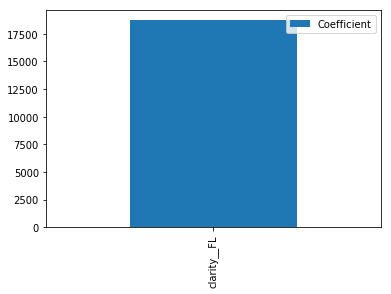

coefficients: [18719.21308592]
intercept: 3782.162671655679
Mean squared error: 74331881.10
R2 Variance score: 0.00
       clarity__FL
95968            0
18173            0
        actual      predict         diff       diff%
95968     2703  3782.162672 -1079.162672   39.924627
18173      712  3782.162672 -3070.162672  431.202622
43632      861  3782.162672 -2921.162672  339.275572
8241       456  3782.162672 -3326.162672  729.421639
109702    3825  3782.162672    42.837328    1.119930
17779      535  3782.162672 -3247.162672  606.946294
39020      691  3782.162672 -3091.162672  447.346262
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  0.0007998133278726005


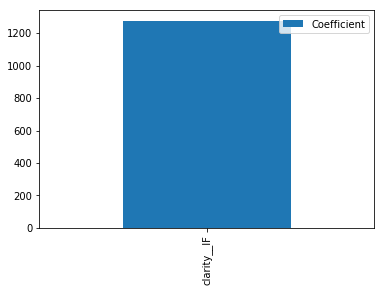

coefficients: [1275.47191807]
intercept: 3782.1527722654387
Mean squared error: 74600180.46
R2 Variance score: 0.00
       clarity__IF
95968            0
18173            0
        actual      predict         diff       diff%
95968     2703  3782.152772 -1079.152772   39.924261
18173      712  3782.152772 -3070.152772  431.201232
43632      861  3782.152772 -2921.152772  339.274422
8241       456  3782.152772 -3326.152772  729.419468
109702    3825  3782.152772    42.847228    1.120189
17779      535  3782.152772 -3247.152772  606.944443
39020      691  3782.152772 -3091.152772  447.344830
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  0.005147048833626489


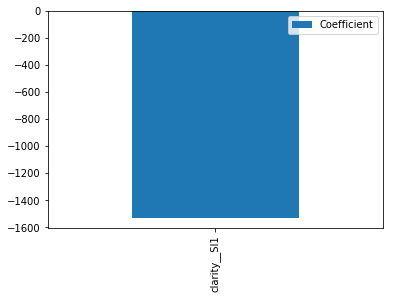

coefficients: [-1531.29406483]
intercept: 4201.56318436307
Mean squared error: 74275616.32
R2 Variance score: 0.01
       clarity__SI1
95968             0
18173             0
        actual      predict         diff       diff%
95968     2703  4201.563184 -1498.563184   55.440739
18173      712  4201.563184 -3489.563184  490.107189
43632      861  4201.563184 -3340.563184  387.986433
8241       456  2670.269120 -2214.269120  485.585333
109702    3825  4201.563184  -376.563184    9.844789
17779      535  4201.563184 -3666.563184  685.338913
39020      691  4201.563184 -3510.563184  508.040982
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  0.004309058141664157


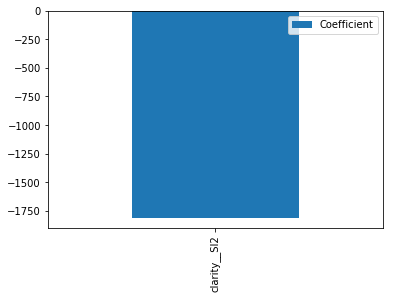

coefficients: [-1809.9995474]
intercept: 4082.5137521445104
Mean squared error: 74338180.61
R2 Variance score: 0.00
       clarity__SI2
95968             0
18173             0
        actual      predict         diff       diff%
95968     2703  4082.513752 -1379.513752   51.036395
18173      712  4082.513752 -3370.513752  473.386763
43632      861  4082.513752 -3221.513752  374.159553
8241       456  4082.513752 -3626.513752  795.288104
109702    3825  4082.513752  -257.513752    6.732386
17779      535  4082.513752 -3547.513752  663.086683
39020      691  4082.513752 -3391.513752  490.812410
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  0.0028764946355203103


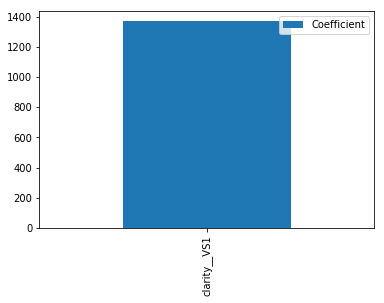

coefficients: [1370.84216214]
intercept: 3621.5497937935393
Mean squared error: 74445135.65
R2 Variance score: 0.00
       clarity__VS1
95968             0
18173             0
        actual      predict         diff       diff%
95968     2703  3621.549794  -918.549794   33.982604
18173      712  3621.549794 -2909.549794  408.644634
43632      861  3621.549794 -2760.549794  320.621347
8241       456  3621.549794 -3165.549794  694.199516
109702    3825  3621.549794   203.450206    5.318960
17779      535  3621.549794 -3086.549794  576.925195
39020      691  3621.549794 -2930.549794  424.102720
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  1.5730247203693537e-06


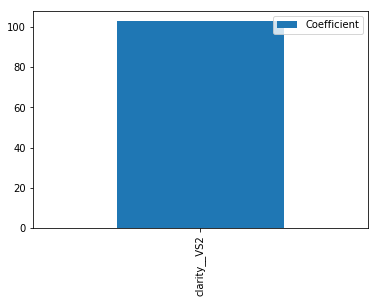

coefficients: [103.05069441]
intercept: 3823.3141445870883
Mean squared error: 74659777.00
R2 Variance score: 0.00
       clarity__VS2
95968             0
18173             1
        actual      predict         diff       diff%
95968     2703  3823.314145 -1120.314145   41.447064
18173      712  3926.364839 -3214.364839  451.455736
43632      861  3823.314145 -2962.314145  344.055069
8241       456  3823.314145 -3367.314145  738.446084
109702    3825  3823.314145     1.685855    0.044075
17779      535  3926.364839 -3391.364839  633.899970
39020      691  3823.314145 -3132.314145  453.301613
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  0.0008382090888334748


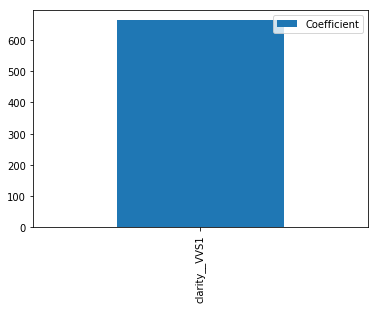

coefficients: [663.84867517]
intercept: 3757.264538062598
Mean squared error: 74597313.84
R2 Variance score: 0.00
       clarity__VVS1
95968              0
18173              0
        actual      predict         diff       diff%
95968     2703  3757.264538 -1054.264538   39.003498
18173      712  3757.264538 -3045.264538  427.705694
43632      861  3757.264538 -2896.264538  336.383802
8241       456  3757.264538 -3301.264538  723.961522
109702    3825  4421.113213  -596.113213   15.584659
17779      535  3757.264538 -3222.264538  602.292437
39020      691  4421.113213 -3730.113213  539.813779
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  0.0007173589422281301


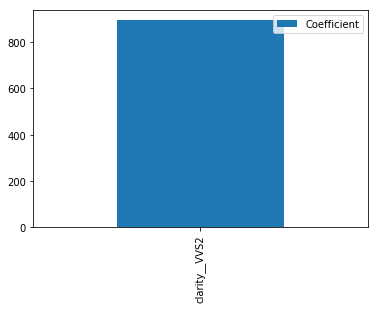

coefficients: [894.39681934]
intercept: 3726.0804903472244
Mean squared error: 74606336.49
R2 Variance score: 0.00
       clarity__VVS2
95968              1
18173              0
        actual     predict        diff       diff%
95968     2703  4620.47731 -1917.47731   70.938857
18173      712  3726.08049 -3014.08049  423.325912
43632      861  4620.47731 -3759.47731  436.640803
8241       456  3726.08049 -3270.08049  717.122915
109702    3825  3726.08049    98.91951    2.586131
17779      535  3726.08049 -3191.08049  596.463643
39020      691  3726.08049 -3035.08049  439.230172
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64
Score:  0.7429062134434539


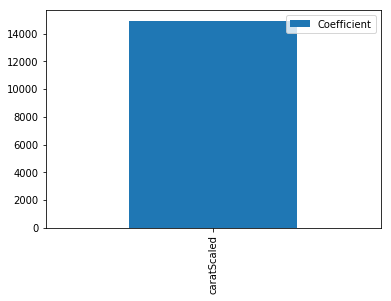

coefficients: [14926.80316553]
intercept: -5993.532236063467
Mean squared error: 19194594.96
R2 Variance score: 0.74
       caratScaled
95968         0.62
18173         0.30
        actual      predict         diff       diff%
95968     2703  3261.085727  -558.085727   20.646901
18173      712 -1515.491286  2227.491286  312.849900
43632      861  -619.883096  1480.883096  171.995714
8241       456 -1515.491286  1971.491286  432.344580
109702    3825  7440.590613 -3615.590613   94.525245
17779      535 -1515.491286  2050.491286  383.269399
39020      691  -918.419160  1609.419160  232.911601
count     35210.000000
mean       3771.394575
std        8640.718426
min         288.000000
25%         588.000000
50%        1243.000000
75%        3158.750000
max      176537.000000
Name: price, dtype: float64


In [20]:
columnSets = ['carat', 'cut__Astor Ideal', 'cut__Good', 'cut__Ideal',
       'cut__Very Good', 'color__D', 'color__E', 'color__F', 'color__G',
       'color__H', 'color__I', 'color__J', 'color__K', 'clarity__FL',
       'clarity__IF', 'clarity__SI1', 'clarity__SI2', 'clarity__VS1',
       'clarity__VS2', 'clarity__VVS1', 'clarity__VVS2', 'caratScaled']

scores = {}
models = {}
for c in columnSets:
    train1 = train[[c]]
    test1 = test[[c]]
    regr, score = run_linear3(train1, train_Y, test1, test_Y, log=True)
    scores[c] = score
    models[c] = regr


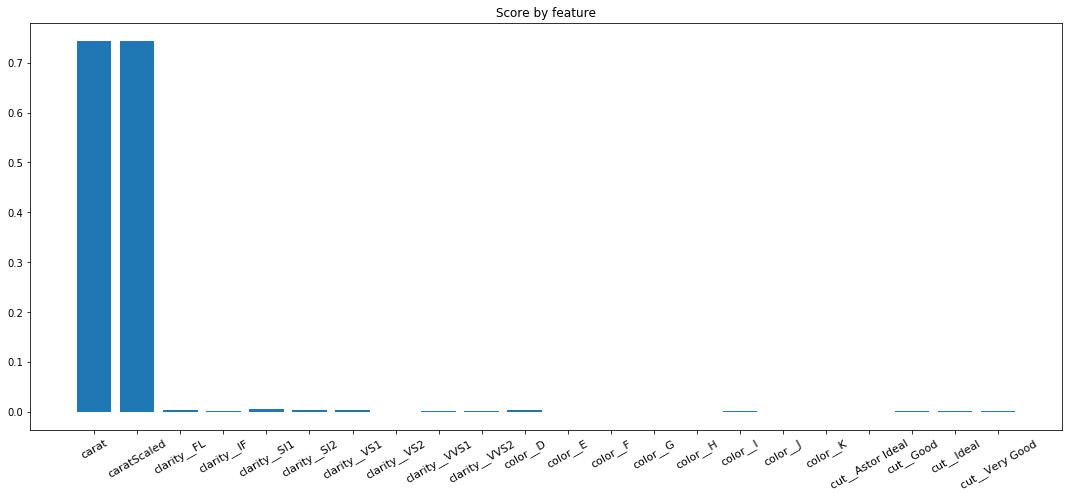

In [21]:
lists = sorted(scores.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_title('Score by feature')
fig.set_size_inches(18.5, 7.5)
plt.xticks(fontsize=11, rotation=30)
plt.show()

## Experiement 2* -- carat ++ features (2-sets)

Score:  0.7429955361707936


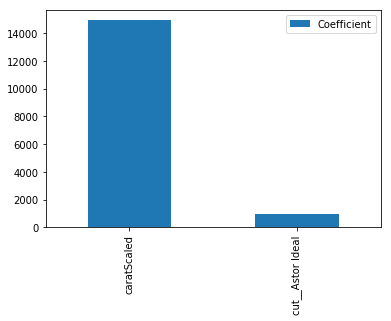

Score:  0.7443742492064784


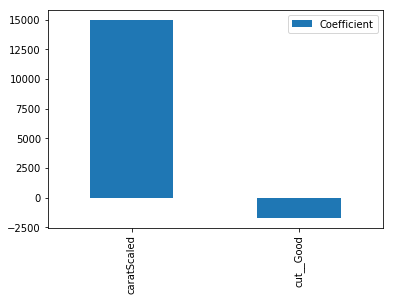

Score:  0.744914142480243


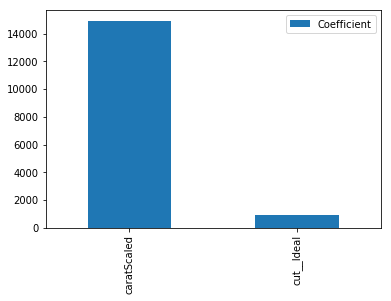

Score:  0.7438687136577595


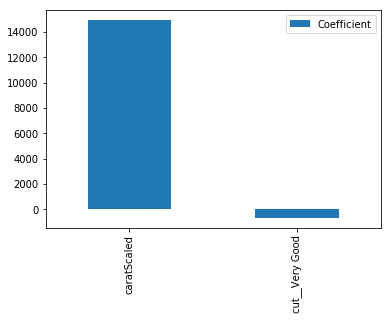

Score:  0.7462410338373626


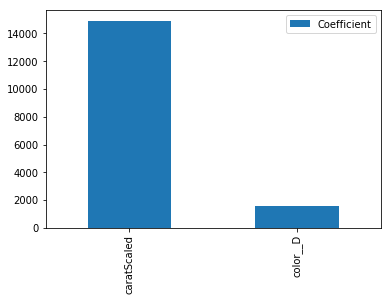

Score:  0.7444929517623037


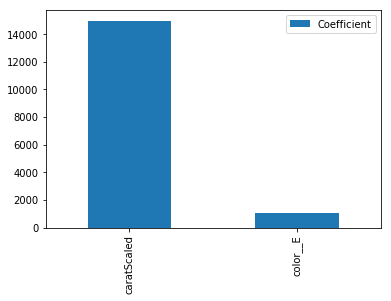

Score:  0.7438902991216385


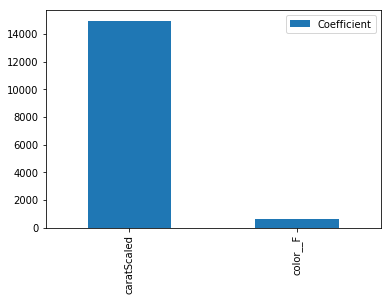

Score:  0.743191160828498


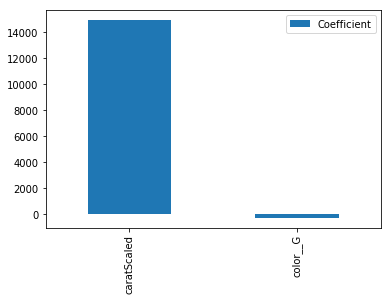

Score:  0.7438961300274134


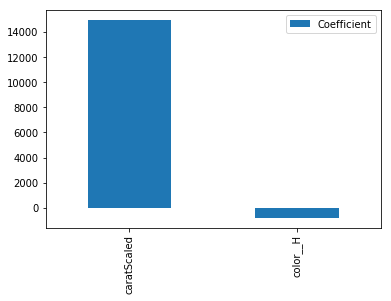

Score:  0.7438368956968108


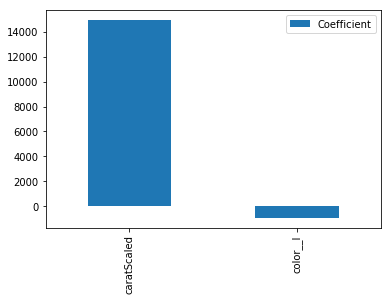

Score:  0.7456433632242074


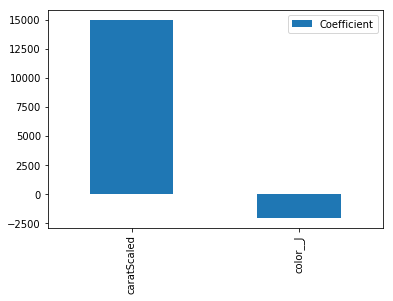

Score:  0.7446915059481959


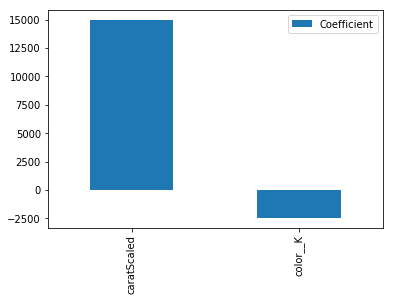

Score:  0.7453332034525654


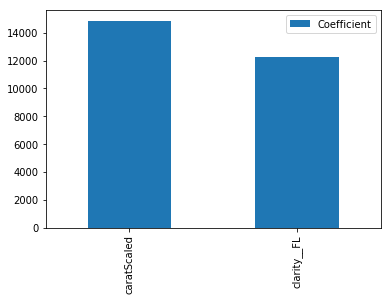

Score:  0.7446318785584661


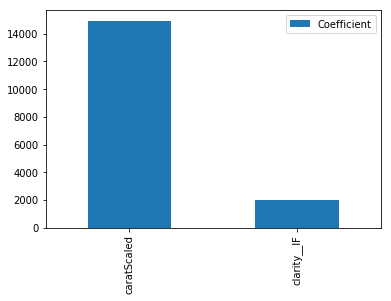

Score:  0.7440131737315756


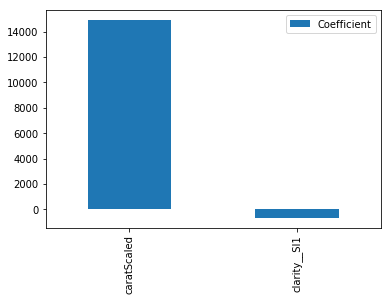

Score:  0.7451873690665158


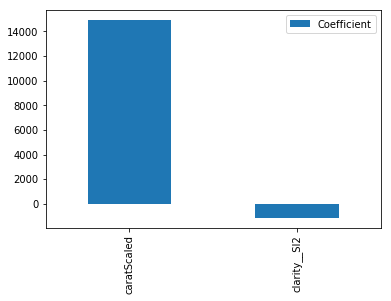

Score:  0.7429395392771037


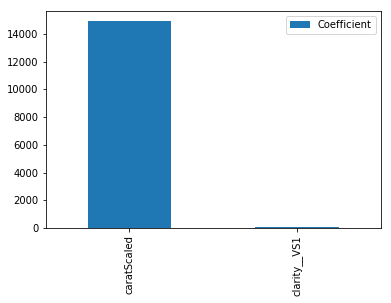

Score:  0.7430571753657276


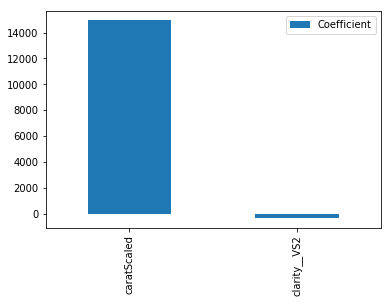

Score:  0.7446809495688349


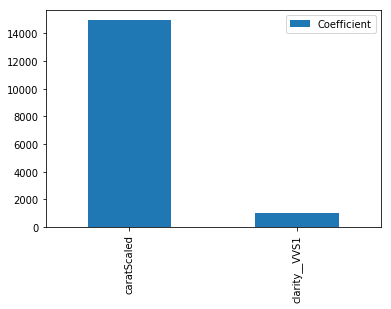

Score:  0.7433263136869421


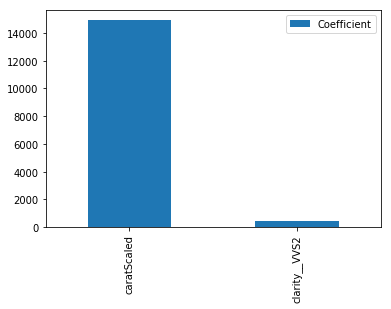

In [22]:
columnSets = [ 'cut__Astor Ideal', 'cut__Good', 'cut__Ideal',
       'cut__Very Good', 'color__D', 'color__E', 'color__F', 'color__G',
       'color__H', 'color__I', 'color__J', 'color__K', 'clarity__FL',
       'clarity__IF', 'clarity__SI1', 'clarity__SI2', 'clarity__VS1',
       'clarity__VS2', 'clarity__VVS1', 'clarity__VVS2']

scores = {}
for c in columnSets:
    train1 = train[['caratScaled',c]]
    test1 = test[['caratScaled',c]]
    regr, score = run_linear3(train1, train_Y, test1, test_Y, log=False)
    scores[c] = score


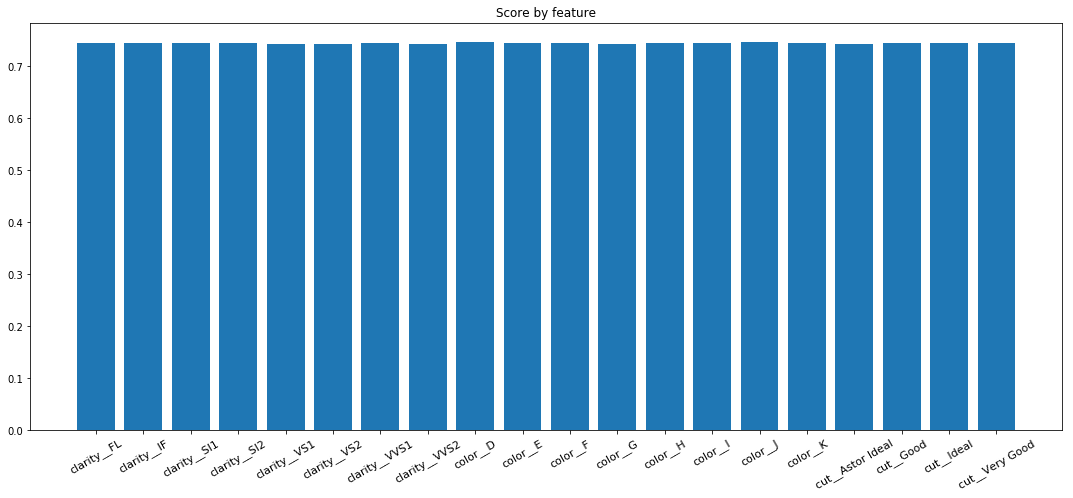

In [20]:
lists = sorted(scores.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_title('Score by feature')
fig.set_size_inches(18.5, 7.5)
plt.xticks(fontsize=11, rotation=30)
plt.show()

### 2-sets all produce about the same, 74% -- modest increase.

Next try sets of the same onehot groups and see if any difference

Score:  0.7456446043112681


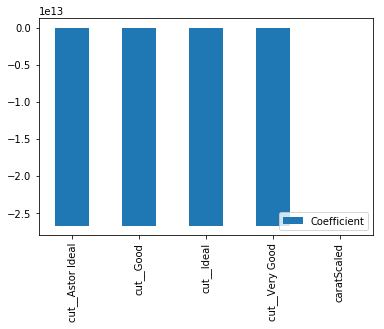

Score:  0.7541481037113309


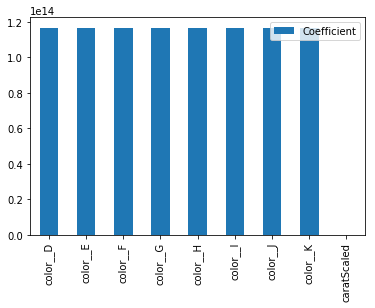

Score:  0.7518636632407159


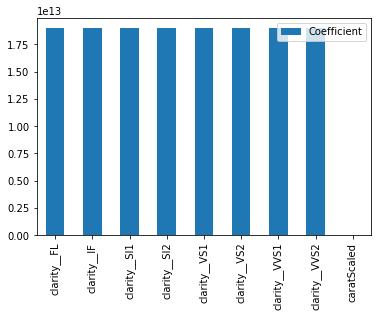

In [23]:
columnSets = [['cut__Astor Ideal', 'cut__Good', 'cut__Ideal','cut__Very Good'],
              ['color__D', 'color__E', 'color__F', 'color__G','color__H', 'color__I', 'color__J', 'color__K'],
              ['clarity__FL','clarity__IF', 'clarity__SI1', 'clarity__SI2', 'clarity__VS1','clarity__VS2', 'clarity__VVS1', 'clarity__VVS2']]

scores = {}
for c in columnSets:
    train1 = train[c+['caratScaled']]
    test1 = test[c+['caratScaled']]
    regr, score = run_linear3(train1, train_Y, test1, test_Y, log=False)
    scores[c[0][:5]] = score

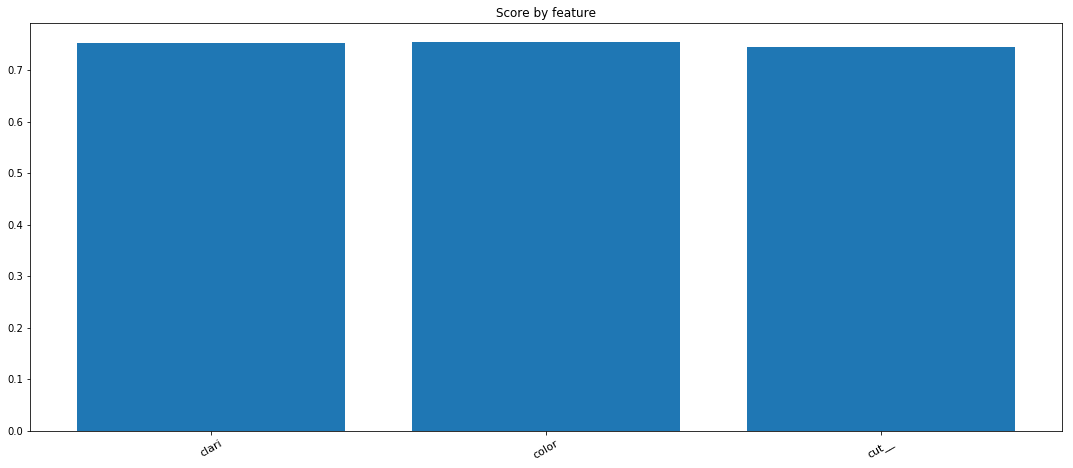

In [22]:
lists = sorted(scores.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_title('Score by feature')
fig.set_size_inches(18.5, 7.5)
plt.xticks(fontsize=11, rotation=30)
plt.show()

### Adding Color or Clarity raises it to 75% -- not much improvement.   

## Experiments 2 and 3 (2-sets and 3-sets)

Try all remaining combinations of columnSets: (c1+c2, c1+c3, c2+c3, c1+c2+c3)

Score:  0.7561732118776333


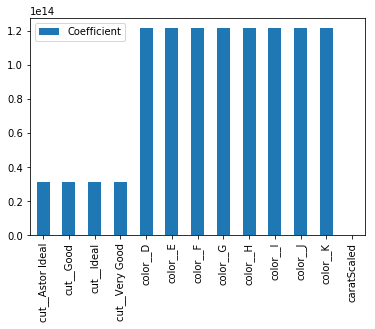

coefficients: [3.14327936e+13 3.14327936e+13 3.14327936e+13 3.14327936e+13
 1.21573129e+14 1.21573129e+14 1.21573129e+14 1.21573129e+14
 1.21573129e+14 1.21573129e+14 1.21573129e+14 1.21573129e+14
 1.50762404e+04]
intercept: -153005922155753.6
Mean squared error: 18204082.26
R2 Variance score: 0.76
       cut__Astor Ideal  cut__Good  cut__Ideal  cut__Very Good  color__D  \
95968                 0          0           0               1         0   
18173                 0          0           0               1         0   

       color__E  color__F  color__G  color__H  color__I  color__J  color__K  \
95968         1         0         0         0         0         0         0   
18173         1         0         0         0         0         0         0   

       caratScaled  
95968         0.62  
18173         0.30  
        actual     predict        diff       diff%
95968     2703  3636.62500  -933.62500   34.540326
18173      712 -1187.78125  1899.78125  266.823209
43632      861 -1

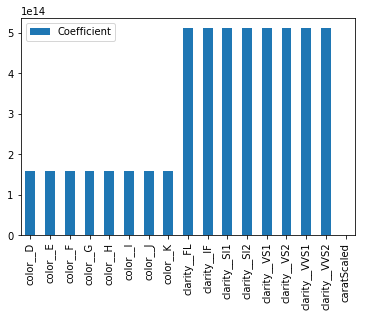

coefficients: [1.58064246e+14 1.58064246e+14 1.58064246e+14 1.58064246e+14
 1.58064246e+14 1.58064246e+14 1.58064246e+14 1.58064246e+14
 5.11202596e+14 5.11202596e+14 5.11202596e+14 5.11202596e+14
 5.11202596e+14 5.11202596e+14 5.11202596e+14 5.11202596e+14
 1.50116558e+04]
intercept: -669266842509229.1
Mean squared error: 17665351.47
R2 Variance score: 0.76
       color__D  color__E  color__F  color__G  color__H  color__I  color__J  \
95968         0         1         0         0         0         0         0   
18173         0         1         0         0         0         0         0   

       color__K  clarity__FL  clarity__IF  clarity__SI1  clarity__SI2  \
95968         0            0            0             0             0   
18173         0            0            0             0             0   

       clarity__VS1  clarity__VS2  clarity__VVS1  clarity__VVS2  caratScaled  
95968             0             0              0              1         0.62  
18173             0    

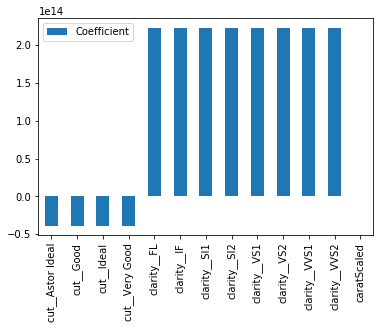

coefficients: [-3.84934370e+13 -3.84934370e+13 -3.84934370e+13 -3.84934370e+13
  2.22606292e+14  2.22606292e+14  2.22606292e+14  2.22606292e+14
  2.22606292e+14  2.22606292e+14  2.22606292e+14  2.22606292e+14
  1.48527635e+04]
intercept: -184112855290527.38
Mean squared error: 18372809.06
R2 Variance score: 0.75
       cut__Astor Ideal  cut__Good  cut__Ideal  cut__Very Good  clarity__FL  \
95968                 0          0           0               1            0   
18173                 0          0           0               1            0   

       clarity__IF  clarity__SI1  clarity__SI2  clarity__VS1  clarity__VS2  \
95968            0             0             0             0             0   
18173            0             0             0             0             1   

       clarity__VVS1  clarity__VVS2  caratScaled  
95968              0              1         0.62  
18173              0              0         0.30  
        actual     predict        diff       diff%
95968    

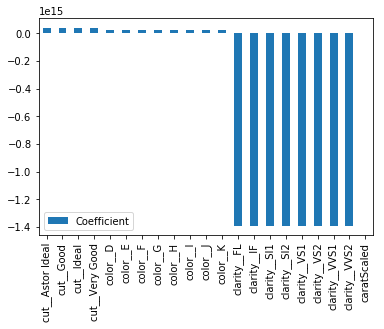

coefficients: [ 4.05965999e+13  4.05965999e+13  4.05965999e+13  4.05965999e+13
  2.63546453e+13  2.63546453e+13  2.63546453e+13  2.63546453e+13
  2.63546453e+13  2.63546453e+13  2.63546453e+13  2.63546453e+13
 -1.38997061e+15 -1.38997061e+15 -1.38997061e+15 -1.38997061e+15
 -1.38997061e+15 -1.38997061e+15 -1.38997061e+15 -1.38997061e+15
  1.50148529e+04]
intercept: 1323019366199705.8
Mean squared error: 17560600.99
R2 Variance score: 0.76
       cut__Astor Ideal  cut__Good  cut__Ideal  cut__Very Good  color__D  \
95968                 0          0           0               1         0   
18173                 0          0           0               1         0   

       color__E  color__F  color__G  color__H  color__I  ...  color__K  \
95968         1         0         0         0         0  ...         0   
18173         1         0         0         0         0  ...         0   

       clarity__FL  clarity__IF  clarity__SI1  clarity__SI2  clarity__VS1  \
95968            0          

In [24]:


cs = [['cut__Astor Ideal', 'cut__Good', 'cut__Ideal','cut__Very Good'],
              ['color__D', 'color__E', 'color__F', 'color__G','color__H', 'color__I', 'color__J', 'color__K'],
              ['clarity__FL','clarity__IF', 'clarity__SI1', 'clarity__SI2', 'clarity__VS1','clarity__VS2', 'clarity__VVS1', 'clarity__VVS2']]

scores = {}
for c in [ cs[0]+cs[1], cs[1]+cs[2], cs[0]+cs[2], cs[0]+cs[1]+cs[2]]:
    train1 = train[c + ['caratScaled']]
    test1 = test[c + ['caratScaled']]
    regr, score = run_linear3(train1, train_Y, test1, test_Y, log=True)
    scores[str(c)] = score


## All features Experiment 4

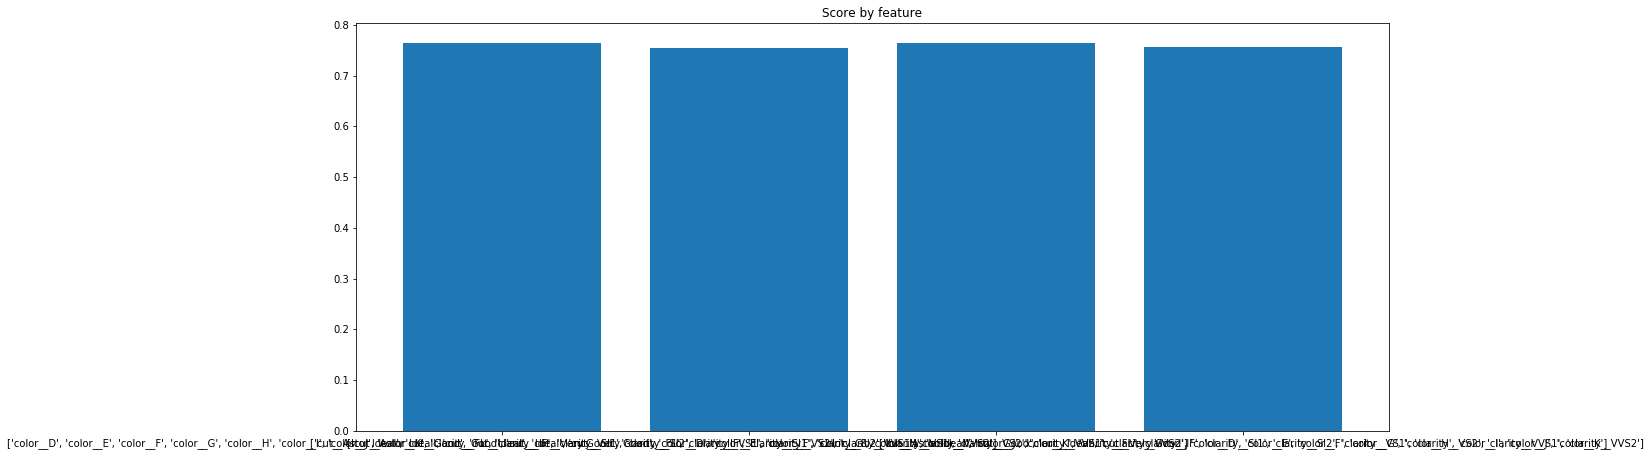

In [25]:
lists = sorted(scores.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_title('Score by feature')
fig.set_size_inches(18.5, 7.5)
#plt.xticks(fontsize=11, rotation=30)
plt.show()

### Not much difference, 76.4% if we leave out color but add the rest (3rd bar is Carat+Cut+Clarity)

--

## Now try some other fancier linear models Experiements 4*,5,6

In [26]:
print('----ridge----')
from sklearn.linear_model import Ridge
import numpy as np
for a in [1.0,2.0,3.0,4.0,5.0,10.0,50.0, 200.0]:
    clf = Ridge(alpha=a)
    clf.fit(train1, train_Y)
    print(clf.score(test1, test_Y))

print('----lasso----')
from sklearn import linear_model
for a in [0.1,0.2,0.5,1.0,5.0, 20.0]:
    reg = linear_model.Lasso(alpha=a)
    reg.fit(train1, train_Y)
    print(reg.score(test1, test_Y))

    
print('----isotonic single var----')
from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
iso_reg = IsotonicRegression(y_min=500).fit(train1['caratScaled'], train_Y)
print(iso_reg.score(test1['caratScaled'], test_Y))


print('----elastic regular----')
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
regr = ElasticNet(random_state=0)
regr.fit(train1, train_Y)
print(regr.coef_) 
print(regr.intercept_) 
print(regr.score(test1, test_Y))


----ridge----
0.7647961417655683
0.764805807568028
0.7648153647000941
0.7648248145152875
0.7648341583473431
0.7648793330978065
0.7651632723165755
0.7655809364646169
----lasso----
0.7647989180291747
0.7648113152709487
0.7648475637610418
0.7649048337937673
0.7652215087736858
0.7646231031987074
----isotonic single var----
0.8216663345408373
----elastic regular----
[  16.68014278  -78.17885479  197.94872553 -136.45175627  314.90015886
   53.57379085   26.76358594  -31.33931945  -25.18592494 -157.97936555
 -106.49813406  -72.22917874   98.7802621   113.51278528 -319.41188705
 -290.28561998  171.94915895  -22.67536803  126.19013732  119.94340822
 5215.20024401]
309.33906441523095
0.4443415363222547


In [27]:
## random forests

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=2, random_state=8, n_estimators=100)
rfr.fit(train1, train_Y)  

print('Score: ', rfr.score(test1, test_Y))
print(rfr.feature_importances_)
print(rfr.predict(test1))

Score:  0.7949120470998488
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1247.08718316 1247.08718316 1247.08718316 ... 1247.08718316 7216.08000357
 1247.08718316]


Vary the learning rate
Score:  0.5728005903433635
Score:  0.8197595414338859
Score:  0.8335397447983608
Score:  0.8380090382957017
Score:  0.8361940333275476
Score:  0.8374472253433004
Vary the estimators
Score:  0.5843056350524508
Score:  0.8203966260446273
Score:  0.8335397447983608
Score:  0.8377670143361908
Score:  0.8413533056066291
Score:  0.8407938398240408
Vary the depth
Score:  0.8335397447983608
Score:  0.9189001665750925
Score:  0.9472119286718009
Score:  0.9557048551040719
Score:  0.9570080595487997
Score:  0.9570080595487997


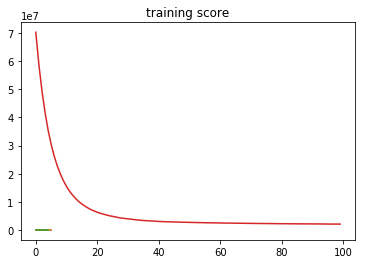

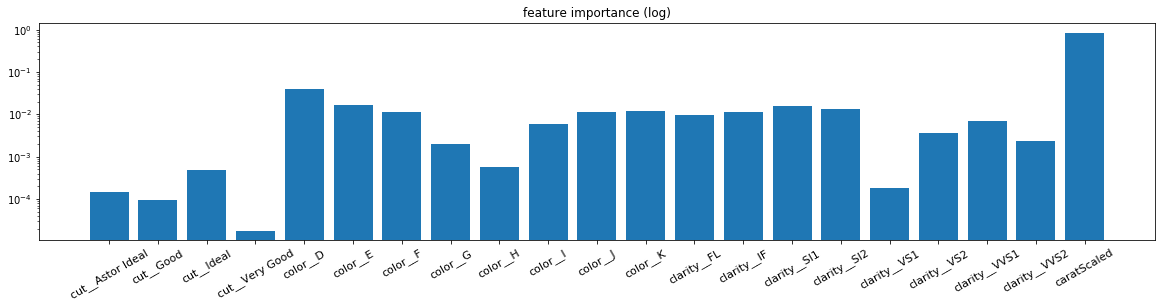

0.9570080595487997
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=8, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [28]:
## xgboost !

import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

def run_emsemble(X_train, y_train, X_test, y_test, norm=True, lr=0.1, ne=100, md=1, g=True):
    est = GradientBoostingRegressor(n_estimators=ne, learning_rate=lr,
        max_depth=md, random_state=8, loss='ls').fit(X_train, y_train)
    score = est.score(X_test, y_test)
    print('Score: ',score)
    mean_squared_error(y_test, est.predict(X_test))    

    if (g):
        plt.plot(est.train_score_)
        plt.title('training score')
        plt.show()

        index = np.arange(len(est.feature_importances_))
        plt.figure(figsize=(20,4))
        plt.bar(index, est.feature_importances_)
        plt.title('feature importance (log)')
        plt.xticks(index, X_test.columns, fontsize=11, rotation=30)
        plt.yscale('log')
        plt.show()

    return score,est

print('Vary the learning rate')
scores = []
for i in [0.01, 0.05, 0.1, 0.2, 0.4, 0.8]:
    scores.append(run_emsemble(train1, train_Y, test1, test_Y, True, i, 100, 1, False)[0])
plt.plot(scores)

print('Vary the estimators')
scores = []
for i in [10, 50, 100, 150, 300, 1000]:
    scores.append(run_emsemble(train1, train_Y, test1, test_Y, True, 0.1, i, 1, False)[0])
plt.plot(scores)

print('Vary the depth')
scores = []
for i in [1,2,3,4,5]:
    scores.append(run_emsemble(train1, train_Y, test1, test_Y, True, 0.1, 100, i, False)[0])
plt.plot(scores)

# depth 5 gets 95% accuracy !
score, model = run_emsemble(train1, train_Y, test1, test_Y, True, 0.1, 100, 5, True)
print(score)
print(model)


## Saving the models for AzureML


In [29]:
from sklearn.externals import joblib
import os

os.makedirs('outputs', exist_ok=True)
# note file saved in the outputs folder is automatically uploaded into experiment record
joblib.dump(value=models['carat'], filename='outputs/sklearn_diamond_simple_model.pkl')
joblib.dump(value=models['caratScaled'], filename='outputs/sklearn_diamond_simple2_model.pkl')
joblib.dump(value=model, filename='outputs/sklearn_diamond_xgb_model.pkl')
joblib.dump(value=rfr, filename='outputs/sklearn_diamond_randomforest_model.pkl')
joblib.dump(value=iso_reg, filename='outputs/sklearn_diamond_isoridgelineartreg_model.pkl')

print('done')



done
